<a href="https://colab.research.google.com/github/Paul-mwaura/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/blob/main/Segmentation_of_Teeth_in_Panoramic_X_ray_Image_Using_U_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segmentation-of-Teeth-in-Panoramic-X-ray-Image-Using-U-Net

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
!git clone https://github.com/ImagingYeditepe/Segmentation-of-Teeth-in-Panoramic-X-ray-Image.git

# These codes doesnt includes augmention tech. for now

Cloning into 'Segmentation-of-Teeth-in-Panoramic-X-ray-Image'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 199 (delta 0), reused 0 (delta 0), pack-reused 196
Receiving objects: 100% (199/199), 22.59 MiB | 37.80 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [4]:
import sys
sys.path.append("/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image")

In [5]:
%cd /content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image
#!pip install -qr requirements.txt
#You can  use pip install however colab includes all libraries so we dont need them

/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image


In [6]:
from download_dataset import *
import os
path = "/content/Data"
if os.path.exists(path+'/DentalPanoramicXrays.zip') == False:
  os.mkdir(path)
  download_dataset(path+'/')

Downloading...
Completed...


In [7]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
X,X_sizes=pre_images((512,512),path,True)

In [8]:
from masks_prepare import *
#Y=pre_masks(resize_shape=(512,512),path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Original_Masks')  ORIGINALL MASKS function 
Y=pre_splitted_masks(path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Custom_Masks') #Custom Splitted MASKS size 512x512

In [9]:
X[1]

array([[[211],
        [213],
        [217],
        ...,
        [240],
        [233],
        [235]],

       [[212],
        [213],
        [216],
        ...,
        [240],
        [238],
        [241]],

       [[213],
        [211],
        [213],
        ...,
        [237],
        [239],
        [244]],

       ...,

       [[ 19],
        [ 19],
        [ 18],
        ...,
        [  3],
        [  0],
        [ 33]],

       [[ 18],
        [ 18],
        [ 18],
        ...,
        [  4],
        [  0],
        [ 35]],

       [[ 18],
        [ 18],
        [ 18],
        ...,
        [  2],
        [  0],
        [ 22]]], dtype=uint8)

In [10]:
Y[1]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [11]:
X=np.float32(X/255)
Y=np.float32(Y/255)

In [12]:
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [13]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

32


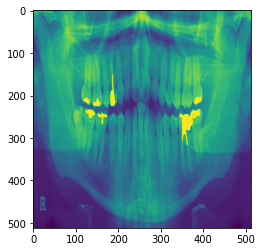

In [14]:
#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])

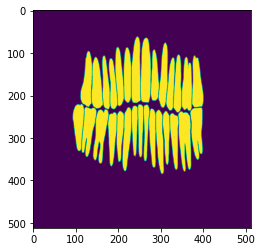

In [15]:
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [16]:
from model import *
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 9248        dropout[0][0]                    
______________________________________________________________________________________________

In [17]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Your choice batch and epoch 
model.fit(x_train,y_train,batch_size=8,epochs=15,verbose=1)

Epoch 1/15
14/14 [==============================] - 66s 1s/step - loss: 0.4592 - accuracy: 0.7425
Epoch 2/15
14/14 [==============================] - 15s 1s/step - loss: 0.2566 - accuracy: 0.8422
Epoch 3/15
14/14 [==============================] - 14s 1s/step - loss: 0.1966 - accuracy: 0.8639
Epoch 4/15
14/14 [==============================] - 14s 1s/step - loss: 0.1720 - accuracy: 0.8730
Epoch 5/15
14/14 [==============================] - 14s 997ms/step - loss: 0.1615 - accuracy: 0.8753
Epoch 6/15
14/14 [==============================] - 14s 996ms/step - loss: 0.1593 - accuracy: 0.8777
Epoch 7/15
14/14 [==============================] - 14s 1s/step - loss: 0.1409 - accuracy: 0.8847
Epoch 8/15
14/14 [==============================] - 14s 1s/step - loss: 0.1420 - accuracy: 0.8843
Epoch 9/15
14/14 [==============================] - 14s 1s/step - loss: 0.1341 - accuracy: 0.8858
Epoch 10/15
14/14 [==============================] - 14s 1s/step - loss: 0.1214 - accuracy: 0.8909
Epoch 11/15
1

In [18]:
predict_img=model.predict(x_test)
##model.save(path)
predict=predict_img[1,:,:,0]

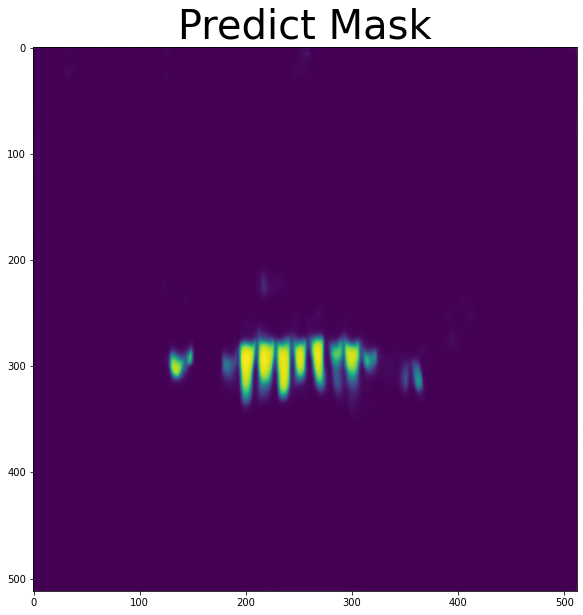

In [19]:
plt.figure(figsize = (20,10))
plt.title("Predict Mask",fontsize = 40)
plt.imshow(predict)
#For CCA, we saved
plt.imsave("/content/predict.png",predict)

In [ ]:
'''from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example
img=cv2.imread("/content/drive/Images/107.png")#original img 107.png 

predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

mask=np.uint8(predict1*255)# 
_, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 2)
img = cv2.UMat.get(img)
cv2_imshow(img)'''

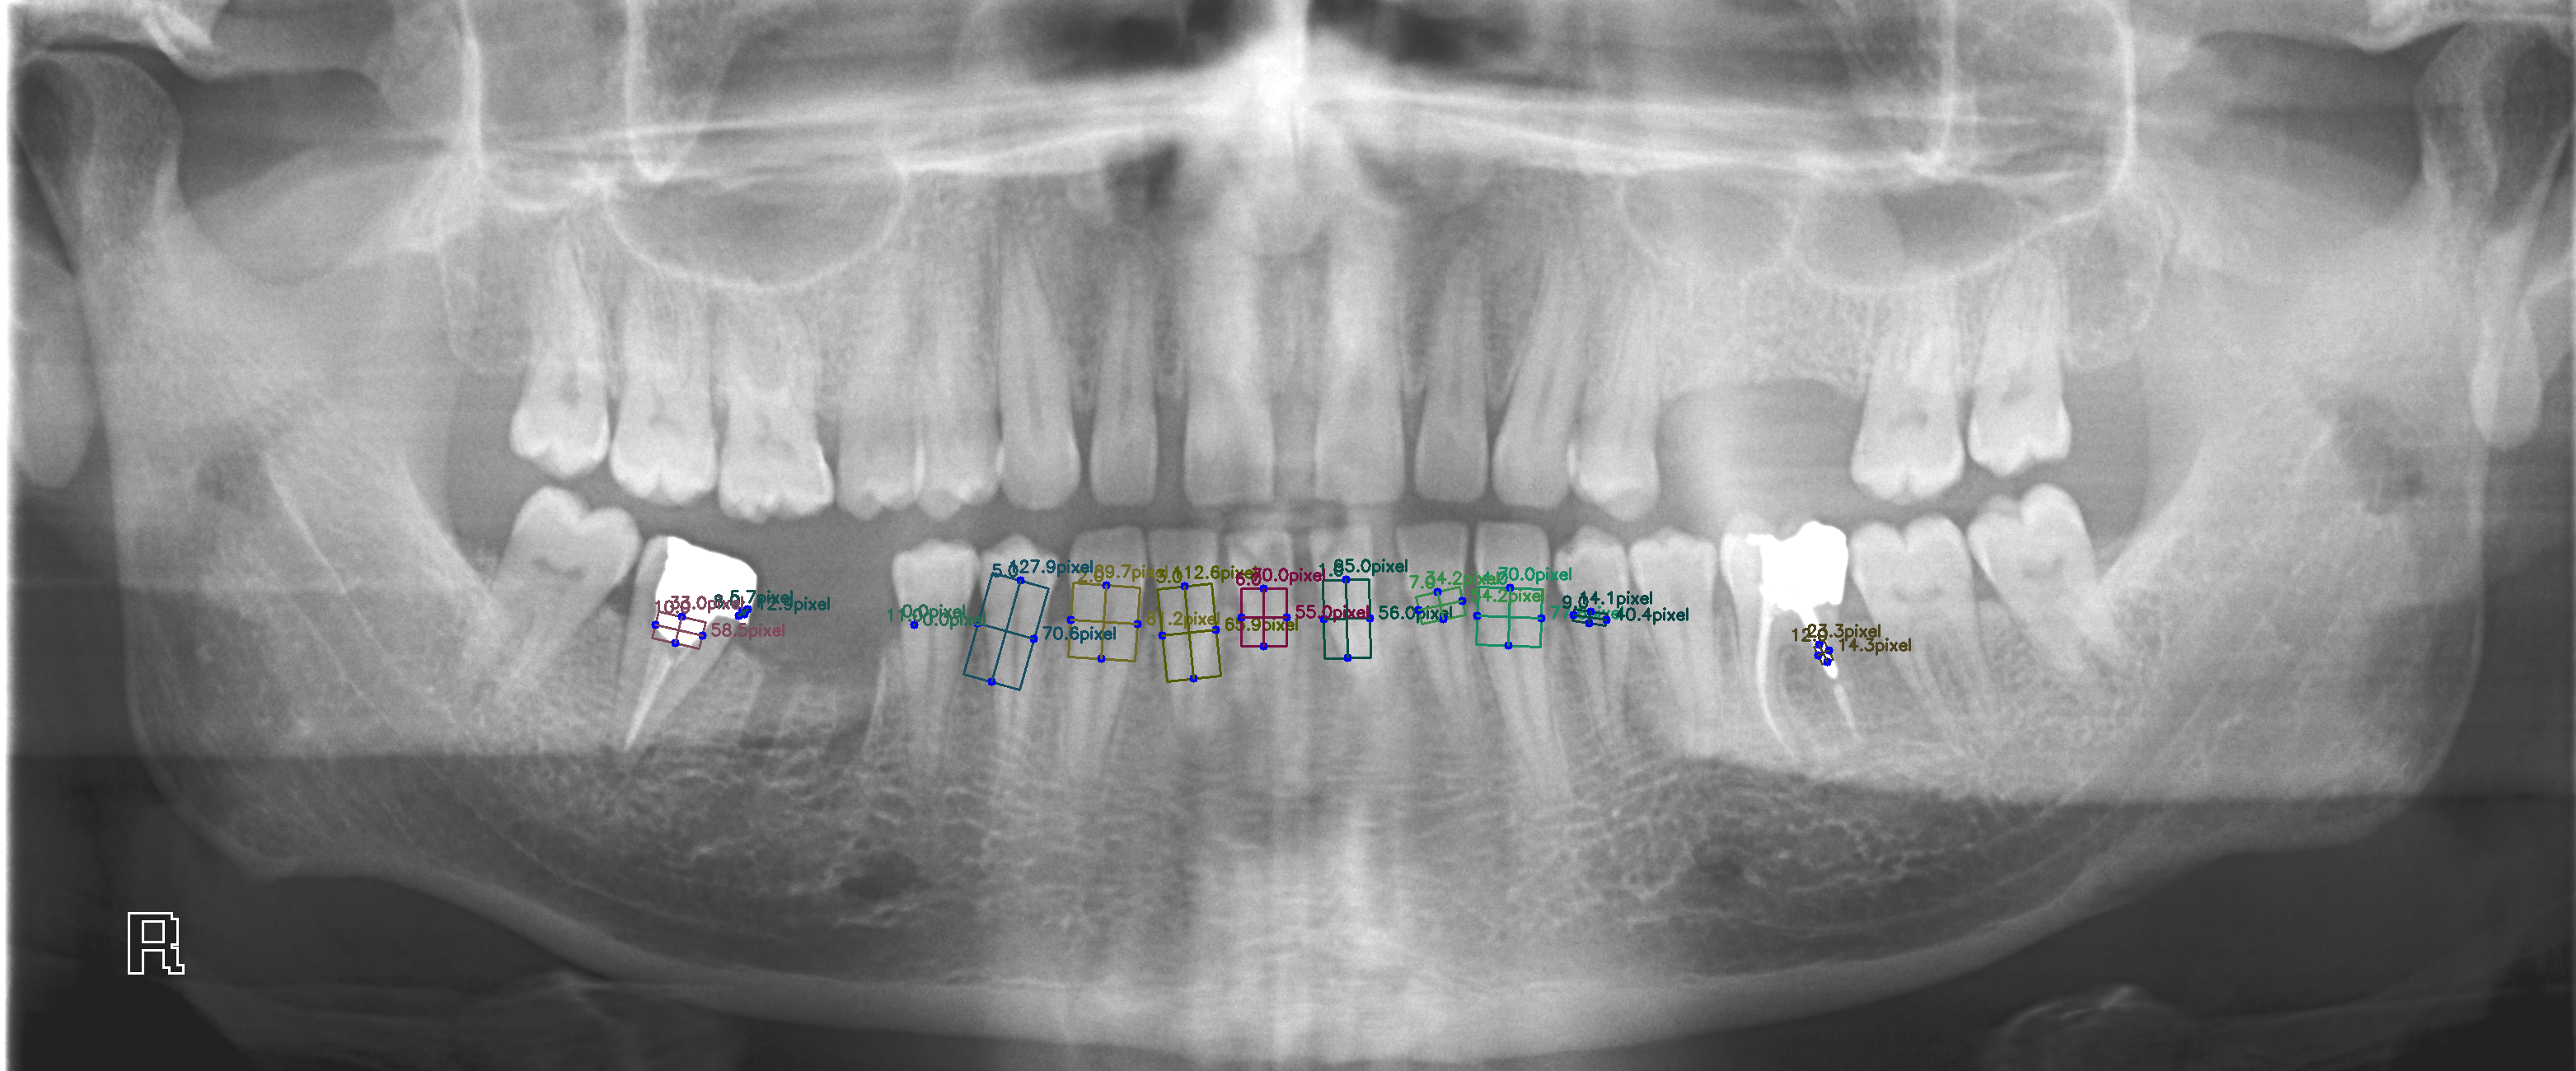

In [22]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example with CCA_Analysis
img=cv2.imread("/content/Data/Images/107.png")#original img 107.png 

#load image (mask was saved by matplotlib.pyplot) 
predicted=cv2.imread("/content/predict.png")

predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

cca_result,teeth_count=CCA_Analysis(img,predicted,3,2)
cv2_imshow(cca_result)

In [23]:
print(teeth_count,"Teeth Count")

6 Teeth Count


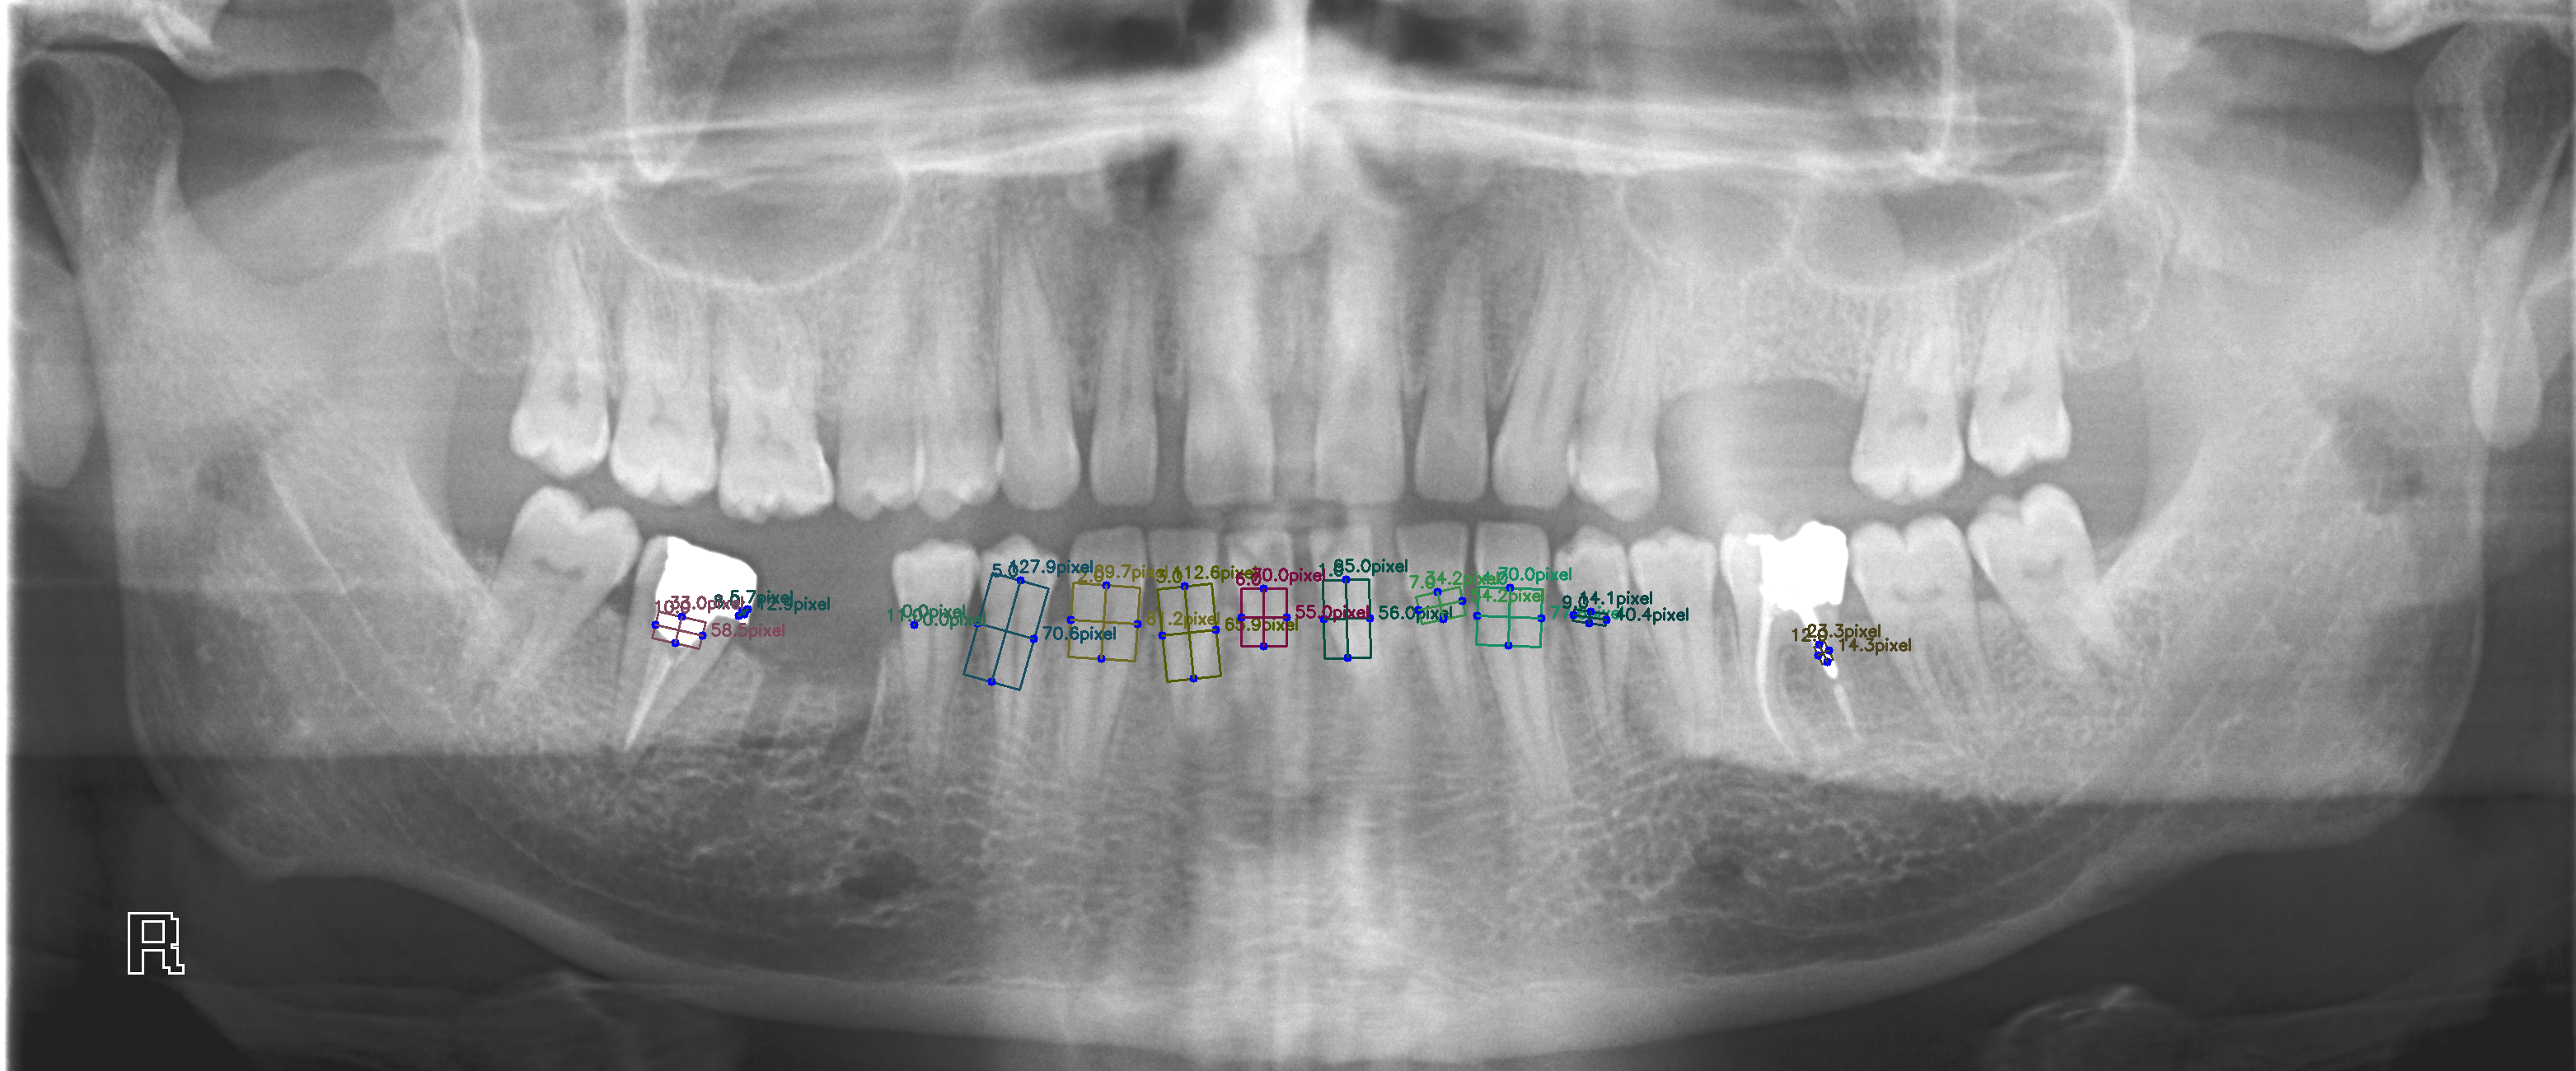

In [24]:
cv2_imshow(img)